### 1. Mô phỏng quy hoạch tần số
Vẽ mạng tổ ong với mỗi cell sẽ có một màu khác nhau để thể hiện các tần số khác nhau

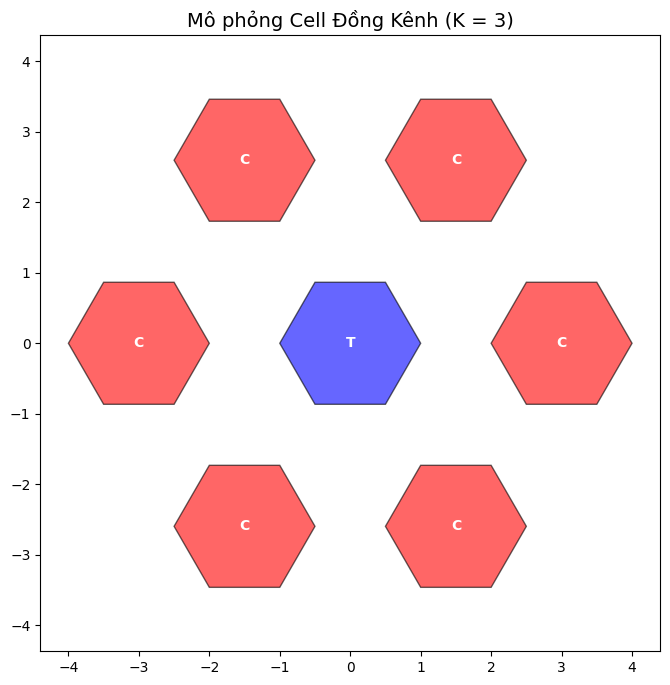

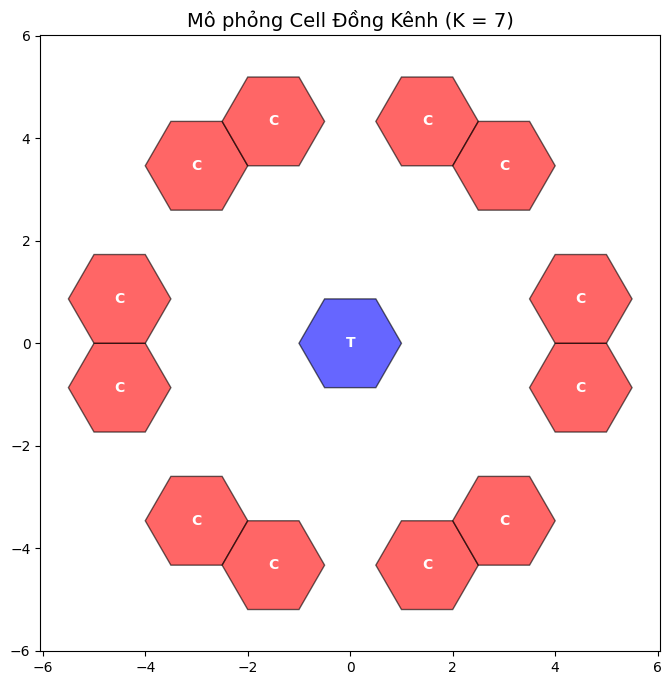

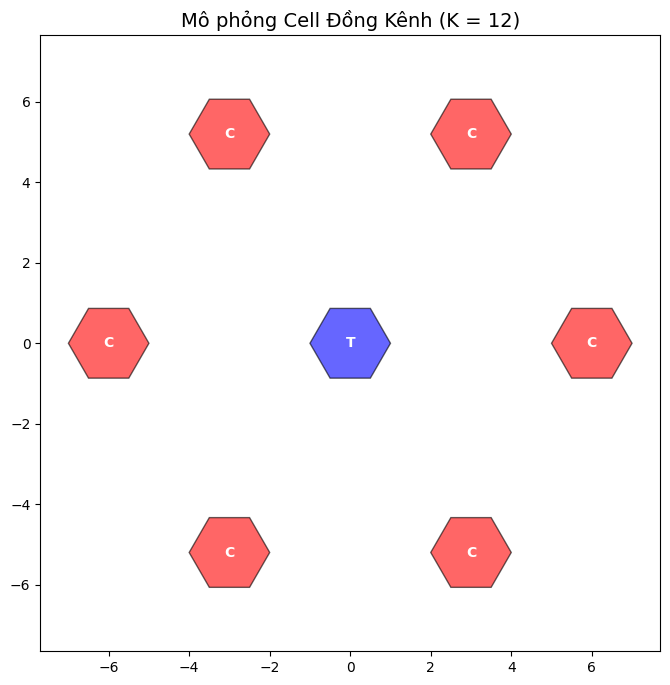

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

def hexagon(center, size, color='b', edge_color='k', label=None):
    """Vẽ một hình lục giác với tâm và kích thước cho trước"""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center[0] + size * np.cos(angles)
    y_hex = center[1] + size * np.sin(angles)
    plt.fill(x_hex, y_hex, color, edgecolor=edge_color, alpha=0.6)
    
    if label:
        plt.text(center[0], center[1], label, fontsize=10, ha='center', va='center', color='w', fontweight='bold')

def generate_cochannel_cells(i, j, R):
    """Tạo danh sách các cell đồng kênh dựa vào công thức K = i^2 + ij + j^2"""
    K = i**2 + i*j + j**2  # Tính số cụm tần số
    dx_1 = 3/2 * R
    dy_1 = np.sqrt(3) / 2 * R
    dx_2 = 0
    dy_2 = np.sqrt(3) * R

    base_x, base_y = 0, 0  # Tâm của cell trung tâm
    cochannel_cells = [(base_x, base_y)]  # Bắt đầu từ cell trung tâm

    for m in range(-5, 6):  # Quét vùng rộng để tìm cell đồng kênh
        for n in range(-5, 6):
            if m**2 + m*n + n**2 == K:  # Điều kiện đồng kênh
                x = base_x + (m * dx_1 + n * dx_2)
                y = base_y + (m * dy_1 + n * dy_2)
                cochannel_cells.append((x, y))
    
    return cochannel_cells

def plot_frequency_reuse(i, j, R):
    """Vẽ sơ đồ cell với các cell đồng kênh"""
    K = i**2 + i*j + j**2
    cochannel_cells = generate_cochannel_cells(i, j, R)

    plt.figure(figsize=(8, 8))

    # Vẽ các cell đồng kênh
    for idx, (x, y) in enumerate(cochannel_cells):
        color = 'r' if idx > 0 else 'b'  # Màu đỏ cho cell đồng kênh, xanh cho cell trung tâm
        label = 'C' if idx > 0 else 'T'  # "C" là cell đồng kênh, "T" là cell trung tâm
        hexagon((x, y), R, color=color, edge_color='black', label=label)

    plt.axis("equal")
    plt.title(f"Mô phỏng Cell Đồng Kênh (K = {K})", fontsize=14)
    plt.show()

# Chạy mô phỏng với các giá trị K = 3, 7, 12
plot_frequency_reuse(i=1, j=1, R=1)  # K = 3
plot_frequency_reuse(i=2, j=1, R=1)  # K = 7
plot_frequency_reuse(i=2, j=2, R=1)  # K = 12



### 2. Tính toán nhiễu đồng kênh

In [2]:
def co_channel_interference(K, R=1, gamma=4):
    """Tính nhiễu đồng kênh dựa trên hệ số K"""
    D = R * np.sqrt(3 * K)  # Khoảng cách tái sử dụng
    N = 6  # Số cell đồng kênh
    I = 1 / sum([(D/R)**gamma for _ in range(N)])  # Công thức tính nhiễu
    return I

# Tính nhiễu cho K=7 và K=12
for K in [7, 12]:
    I = co_channel_interference(K)
    print(f"Nhiễu đồng kênh với K={K}: {I:.6f}")


Nhiễu đồng kênh với K=7: 0.000378
Nhiễu đồng kênh với K=12: 0.000129


Khi K tăng, khoảng cách giữa các cell đồng kênh cũng tăng, làm giảm nhiễu đồng kênh.

K = 12 có nhiễu thấp hơn so với K = 7, nhưng hiệu suất sử dụng tần số cũng giảm.